<a href="https://colab.research.google.com/github/novitaamanda14/33330075_Novita-Amanda_Miniproject/blob/main/UAS_ANALITIKA_DATA_NOVITA_AMANDA_3333210075_KELAS_D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

The coding above serves to:

pandas: Using pandas, you can perform various operations such as reading and writing data from various file formats, performing filters, processing, and data analysis easily.

numpy: Using numpy, you can perform various mathematical operations and array manipulations easily.

matplotlib.pyplot: Using matplotlib.pyplot, you can create different types of plots such as line plots, scatter plots, histograms, bar plots, and more. You can also set visual aspects such as axis labels, plot titles, colors, and line styles.

seaborn: Seaborn provides various other functions and plots such as distribution plots, categorical plots, and heatmap plots that facilitate the analysis and visualization of statistical data.

math: After you import math, you can use the various math functions provided by the library.

datetime: Datetime provides various attributes and methods for accessing and manipulating date and time components such as years, months, days, hours, minutes, seconds, and more.

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/notshrirang/reliance-stock-price-dataset

In [3]:
# https://drive.google.com/file/d/1VHVO5GBVWwc-fm2RZjf2nTy3eM4YpcMh/view?usp=drive_link

!gdown 1VHVO5GBVWwc-fm2RZjf2nTy3eM4YpcMh

Downloading...
From: https://drive.google.com/uc?id=1VHVO5GBVWwc-fm2RZjf2nTy3eM4YpcMh
To: /content/reliance_data.csv
100% 621k/621k [00:00<00:00, 140MB/s]


The coding above is used to download files that we have uploaded on Google Drive


---



ABOUT DATASET

A dataset containing prices of Reliance stock since 1996 to 2020. Contains volume, turnover, open, high, low, close prices of the stock. This dataset is meant to use for predicting the stock prices in future. You may use linear regression or neural networks.

In [4]:
train_data = pd.read_csv('reliance_data.csv')
train_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
2,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
3,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
4,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN


1. train_data = pd.read_csv('reliance_data.csv'): On this line, we use the pd.read_csv() function of the pandas library (imported as pd) to read a CSV file named 'reliance_data.csv' and store it into a train_data variable. This CSV file likely contains data that will be used to train a model or perform further analysis.

2. train_data.head(): On this line, we call the head() method on the train_data object. This method is used to display the first few rows of the DataFrame train_data. Usually, this is done to check and ensure that the data has been read correctly as well as gain an initial understanding of the structure and content of the DataFrame.

Thus, the code imports data from the CSV file 'reliance_data.csv' into the DataFrame train_data using pandas, and then displays the first few rows of that DataFrame.

---




Check missing values

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6205 entries, 0 to 6204
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                6205 non-null   object 
 1   Symbol              6205 non-null   object 
 2   Series              6205 non-null   object 
 3   Prev Close          6205 non-null   float64
 4   Open                6205 non-null   float64
 5   High                6205 non-null   float64
 6   Low                 6205 non-null   float64
 7   Last                5657 non-null   float64
 8   Close               6205 non-null   float64
 9   VWAP                6205 non-null   float64
 10  Volume              6205 non-null   int64  
 11  Turnover            6205 non-null   float64
 12  Trades              2356 non-null   float64
 13  Deliverable Volume  4693 non-null   float64
 14  %Deliverble         4693 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 727.3

The train_data.info() coding is used to obtain information about the structure and characteristics of the data present in the DataFrame

The output generated by train_data.info() will include information such as the number of rows and columns, column names, data types, number of non-null values, and amount of memory usage. This provides an overview of the data contained in the DataFrame, including whether there are missing values or data types that need to be changed for further analysis.

---




Check statistic vales for every features

In [6]:
train_data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,6205.000000,6205.000000,6205.000000,6205.000000,5657.000000,6205.000000,6205.000000,6.205000e+03,6.205000e+03,2.356000e+03,4.693000e+03,4693.000000
mean,864.978445,866.381176,878.763811,852.795649,925.596986,865.291289,865.851146,6.215219e+06,5.187662e+14,1.383690e+05,2.239901e+06,0.436332
std,588.711275,590.165211,599.625939,578.473998,581.604138,588.763023,588.941488,5.479271e+06,7.539147e+14,1.260736e+05,1.861021e+06,0.145526
min,0.000000,102.600000,105.600000,99.600000,101.600000,101.300000,101.840000,5.282000e+04,3.480000e+12,2.991000e+03,2.909700e+04,0.076300
25%,335.200000,335.000000,340.700000,329.500000,437.550000,335.350000,335.710000,3.021751e+06,1.840000e+14,7.119900e+04,1.178486e+06,0.323000
50%,850.650000,852.500000,862.000000,842.100000,892.350000,850.700000,851.680000,4.602904e+06,3.270000e+14,9.841550e+04,1.784092e+06,0.452300
75%,1089.400000,1091.100000,1107.000000,1073.950000,1129.900000,1089.850000,1089.480000,7.304408e+06,5.730000e+14,1.559778e+05,2.685974e+06,0.546300
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.473430e+16,1.428490e+06,3.495888e+07,0.978300


The train_data.describe() coding is used to obtain a statistical summary of the data contained in the DataFrame train_data.

The output generated by train_data.describe() will include information such as the sum of data (count), mean (mean), standard deviation (std), minimum value (min), first quartile (25%), median (50% or second quartile), third quartile (75%), and maximum value (max) of each numeric column in the DataFrame.



---



Handle datetime data for time series

In [7]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

<ipython-input-7-1488af910503>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_data['Date'] = pd.to_datetime(train_data['Date'])


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
1996-01-01,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1996-02-01,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
1996-03-01,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
1996-04-01,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
1996-05-01,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN


The coding above serves to converts the 'Date'
column in the DataFrame train_data into a datetime data type, sets the 'Date' column as the index of the DataFrame, and then displays the first few rows of the modified DataFrame.



---



**EXPLORATORY DATA ANALYSIS**

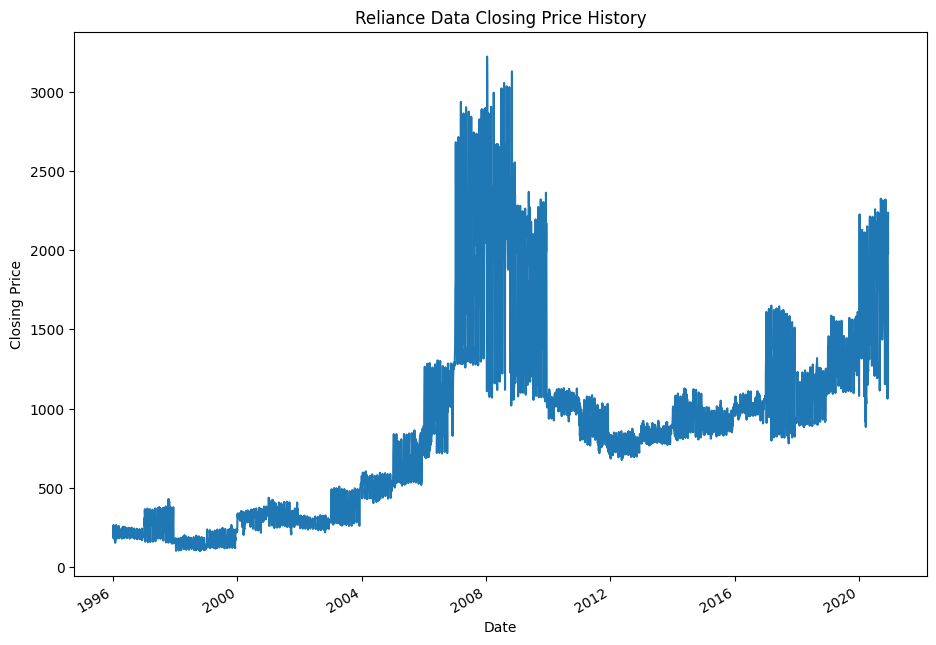

In [10]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Close'].plot()
plt.title('Reliance Data Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

The coding above serves to plot a line from closing price data in the DataFrame train_data. The plot has a title, an x-axis label ('Date'), and a y-axis label ('Closing Price'). The plot size is set using plt.figure(figsize=(11, 8)). Then, the plot is displayed using plt.show().

Based on the chart above, it shows that the closing price has a horizontal trend, because the results of the data move up one time and then go down again.



<Figure size 1600x800 with 0 Axes>

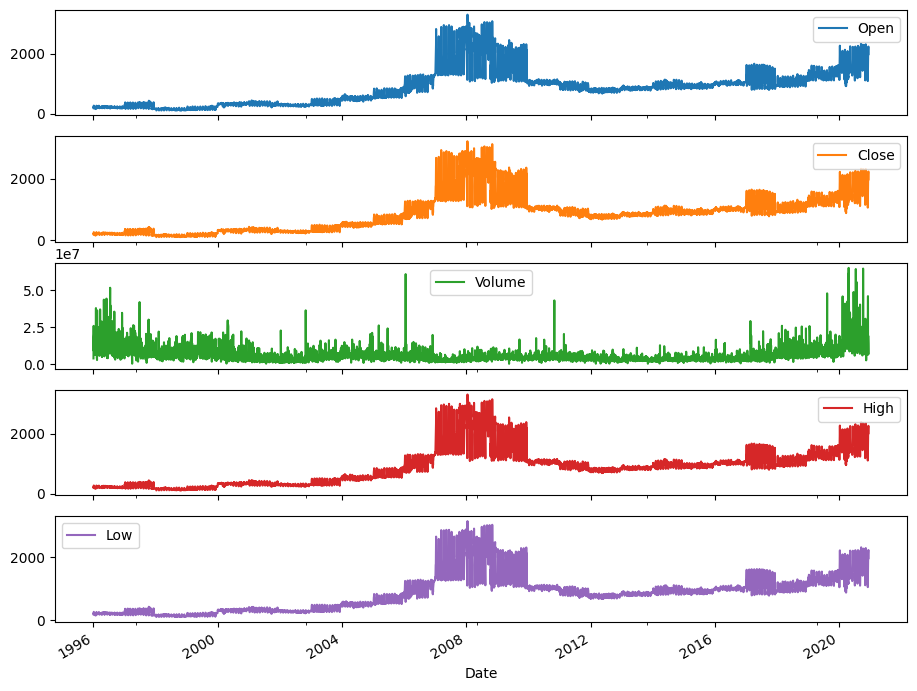

In [11]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

The coding above serves to create several plots displayed in one image. Each plot shows data from predefined columns. Individual plot sizes are set using figsize=(11, 9) and entire images are set using plt.figure(figsize=(16, 8)). Then, those plots are displayed using plt.show().

The plots shown above are 'Open', 'Close', 'Volume', 'High', 'Low'. Based on the graph, it can be concluded that the four plots have a horizontal trend, because the data moves up one time and then goes down again.



In [12]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

The 'HL_PCT' column contains the percentage change in price from the lowest price to the highest price in a period. The 'PCT_change' column contains the percentage price change from the opening price to the closing price in a period. By adding these 'HL_PCT' and 'PCT_change' columns into the DataFrame, we can perform further analysis of price changes and volatility in financial markets or use these columns as features in price prediction models.

In [14]:
df = train_data[['HL_PCT', 'PCT_change', 'Close','Volume']]

The coding above serves to create a new DataFrame consisting of only the columns we need for further analysis or modeling. The 'HL_PCT' and 'PCT_change' columns are used to view price changes and volatility, while the 'Close' and 'Volume' columns provide information on closing prices and trading volume.



In [16]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Close'].shift(-forecast_out)

311


<ipython-input-16-e4fd59988e6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Close'].shift(-forecast_out)


The coding above serves to calculate the amount of data that will be predicted based on a certain percentage of the entire dataset, then print the amount to the screen. Next, we create a new column 'label' in the DataFrame that contains the values to be predicted, using shifts in the 'Close' column.



In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

By importing modules and classes/functions from the sklearn library, we can use these algorithms and functions in regression modeling and evaluation.

In [18]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-18-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


The above coding serves to create a StandardScaler() object to scale features, take features from DataFrame df into variable X, estimate scaling parameters with fit(), and then perform actual scaling with transform() so that data X has been adjusted to the desired scale.

In [19]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

The coding above serves to divide X data into two subsets. The first subset (X_Predictions) contains the data to be predicted, while the second subset (X) contains the data to be used to train the model. By separating this data, we can use a subset of X to train the model and a subset of X_Predictions to make predictions on data that has not been seen before.

In [20]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-20-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


The coding above serves to delete rows containing missing values from the df DataFrame by using dropna(). After that, we take the target value 'label' from the DataFrame that has already deleted the missing value and store it in the y variable as a NumPy array. With this, we are ready to continue the modeling and prediction process using the prepared data.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Using train_test_split(), we divide the X and y data into a subset of training and testing of the specified size. It's important to evaluate the model using data not seen before at the time of training.

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

The coding above serves to create a LinearRegression() object to build a linear regression model, train the model using a training subset (X_train and y_train) with fit(), and calculate the model score on the test subset (X_test and y_test) with score(). In this case, the lr_confidence will contain a score that indicates the confidence level of the linear regression model in the test data.



In [23]:
lr_confidence

0.506930933986689

lr_confidence contains the score or confidence level of the linear regression model on the test data used to test the performance of the pretrained model. The higher the lr_confidence value, the better the linear regression model can predict the target value on the test data.

In [24]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

The above coding serves to create a RandomForestRegressor() object to build a random regression model, train the model using a training subset (X_train and y_train) with fit(), and calculate the model score on the test subset (X_test and y_test) with score(). The rf_confidence variable will contain a score that indicates the confidence level of the random regression model in the test data. The higher the rf_confidence value, the better the random regression model can predict the target value on the test data.

In [ ]:
rf_confidence

0.9740680350944633

rf_confidence contains the random regression model's score or confidence level on the test data used to test the performance of the pretrained model. The higher the rf_confidence value, the better the random regression model can predict the target value on the test data.

In [25]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-25-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-25-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-25-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

The above coding functions to generate forecast data predictions for future time using a random regression (rf) model and store them in the 'Forecast' column in the df DataFrame. Each new row added to the df DataFrame will have a date in the future and a corresponding prediction value.



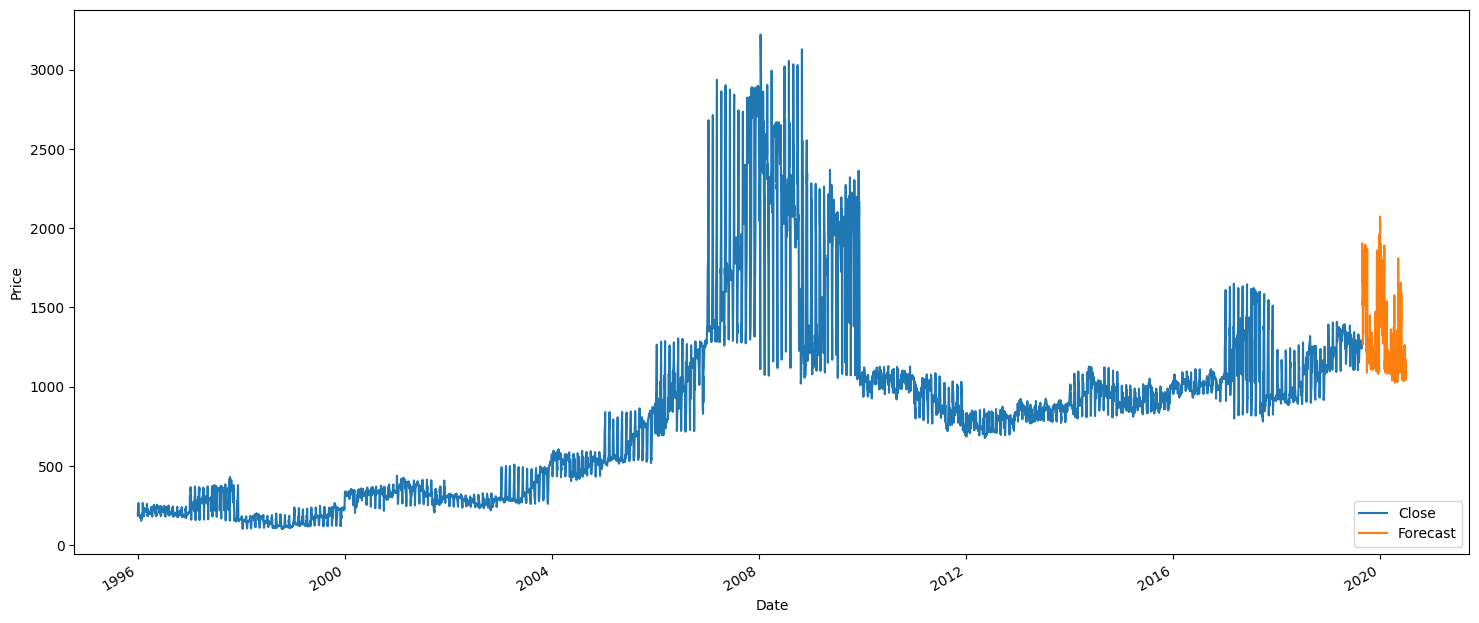

In [26]:
plt.figure(figsize=(18, 8))
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

With the steps above, we create a plot of closing price data (df['Close']) and prediction data (df['Forecast']). A legend is displayed and x and y axis labels are assigned to the plot before finally displaying the plot.

The blue line indicates the pre-exisitng closing price data, and the orange line is the forecast result
